# FOXSI Focal Plane PSF Z dependance 

## Milo 
### UC Berkeley, Jun 2018

**Simulation for a 10-Shell Module with new Blockers**

In [2]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np
import copy

# 10 Shell Module

In [21]:
fbr = 3.0985
rbr = 2.62
focaldistance = 230.0         ## Nominal Focal Distance
Zs = np.arange(-.5,.51,0.05)  ## Z ranging on these values

All_Drays, All_Hrays, All_Prays = [], [], []
All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []

# Loading Rays:
Orays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Zdependance/rays/Z_=_10Shell_1AU.csv')

for z in Zs:
    Brays = copy.deepcopy(Orays)
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    
    # Create detector :
    detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,focaldistance+z], 
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]
    
    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays) 
    
    #sim_scale = 1.0    # 1cm = 17.4 arcmin    
    sim_scale = 17.4    # 1cm = 17.4 arcmin    
    
    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)

    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Zdependance/rays/Z_=_10Shell_1AU.csv loaded.


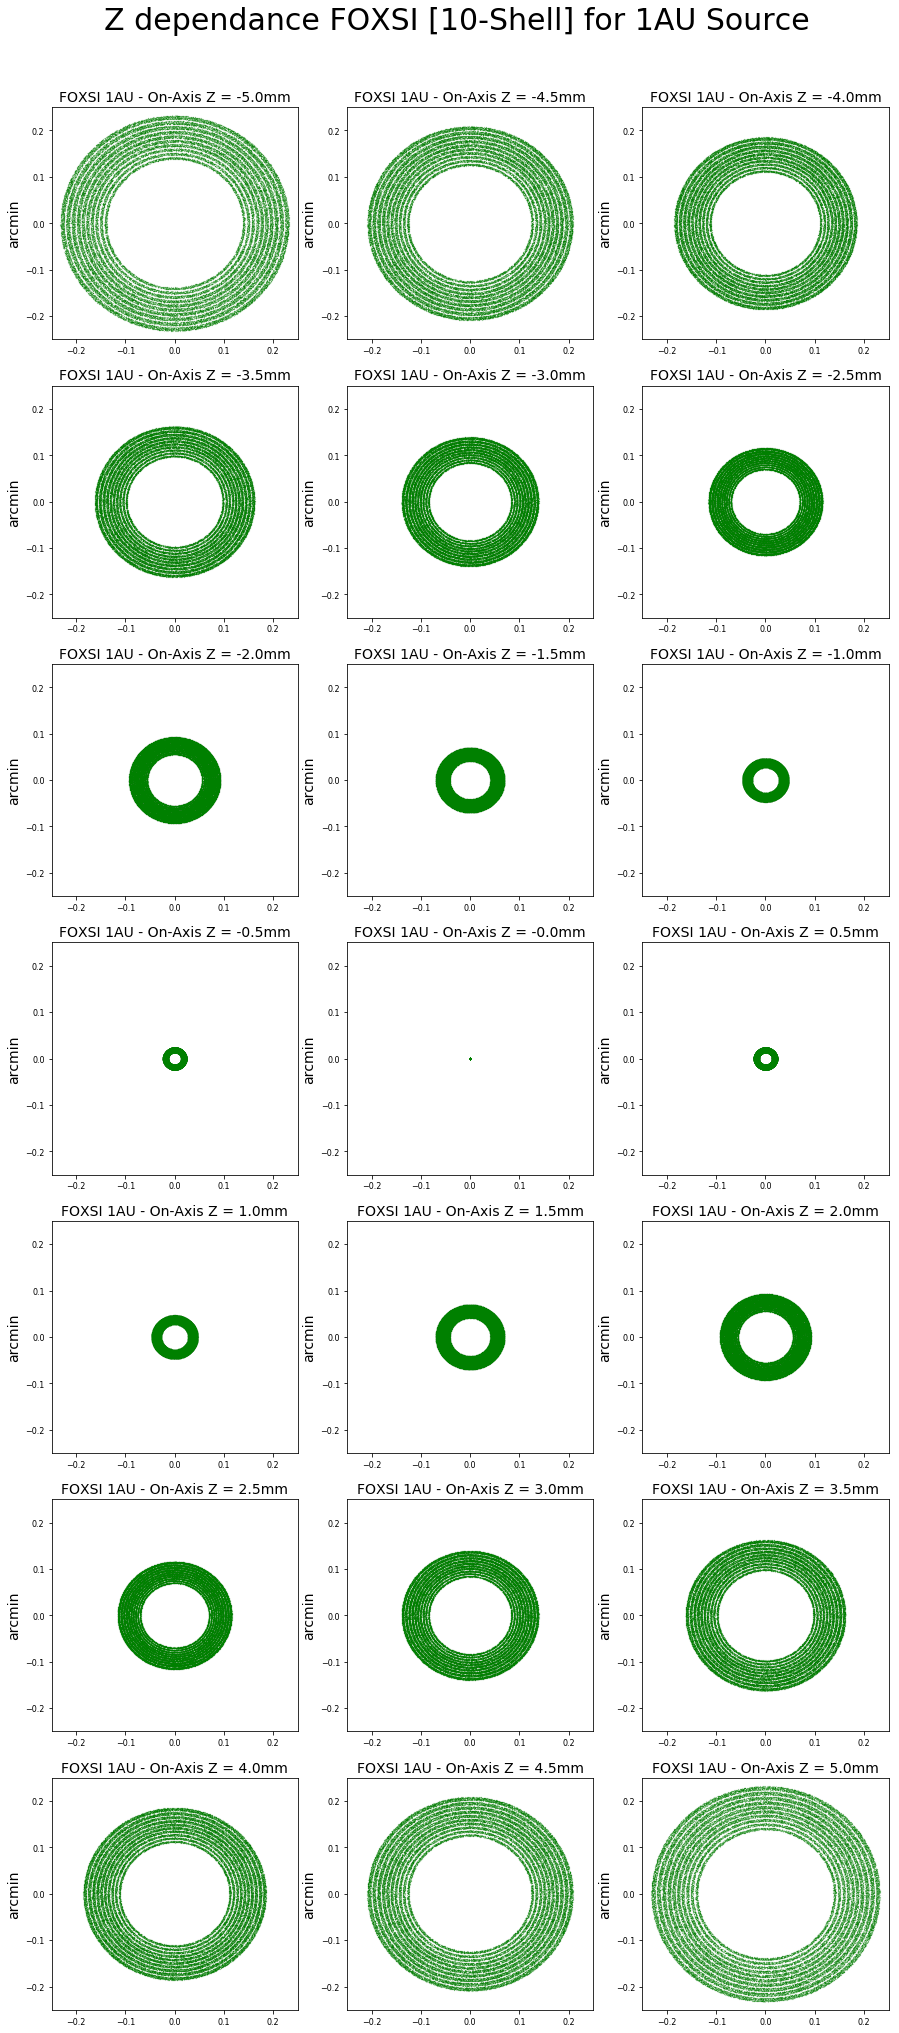

In [22]:
fig = plt.figure(figsize=(15,35))
st = fig.suptitle("Z dependance FOXSI [10-Shell] for 1AU Source", fontsize=30,y=0.92)
for i, z in enumerate(Zs):
    plt.subplot(7,3,i+1)
    plt.title('FOXSI 1AU - On-Axis Z = '+'{:.1f}'.format(z*10.)+'mm',fontsize=14)
    plt.ylabel('arcmin',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=.01,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=.01,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=.01,alpha=0.8)
    plt.ylim(-.25,.25)
    plt.xlim(-.25,.25)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

# 7-Shell Module

In [17]:
fbr = 3.74936
rbr = 3.14
focaldistance = 230.0         ## Nominal Focal Distance
Zs = np.arange(-.5,.51,0.05)  ## Z ranging on these values

All_Drays, All_Hrays, All_Prays = [], [], []
All_Hx7, All_Hy7, All_Px7, All_Py7, All_Dx7, All_Dy7 = [], [], [], [], [], []

# Loading Rays:
Orays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Zdependance/rays/Z_=_7Shell_1AU.csv')

for z in Zs:
    Brays = copy.deepcopy(Orays)
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    
    # Create detector :
    detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,focaldistance+z], 
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==focaldistance+z and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]
    
    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays) 
    
    #sim_scale = 1.0    # 1cm = 17.4 arcmin    
    sim_scale = 17.4    # 1cm = 17.4 arcmin    
    
    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx7.append(Hx)
    All_Hy7.append(Hy)

    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px7.append(Px)
    All_Py7.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx7.append(Dx)
    All_Dy7.append(Dy)

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Zdependance/rays/Z_=_7Shell_1AU.csv loaded.


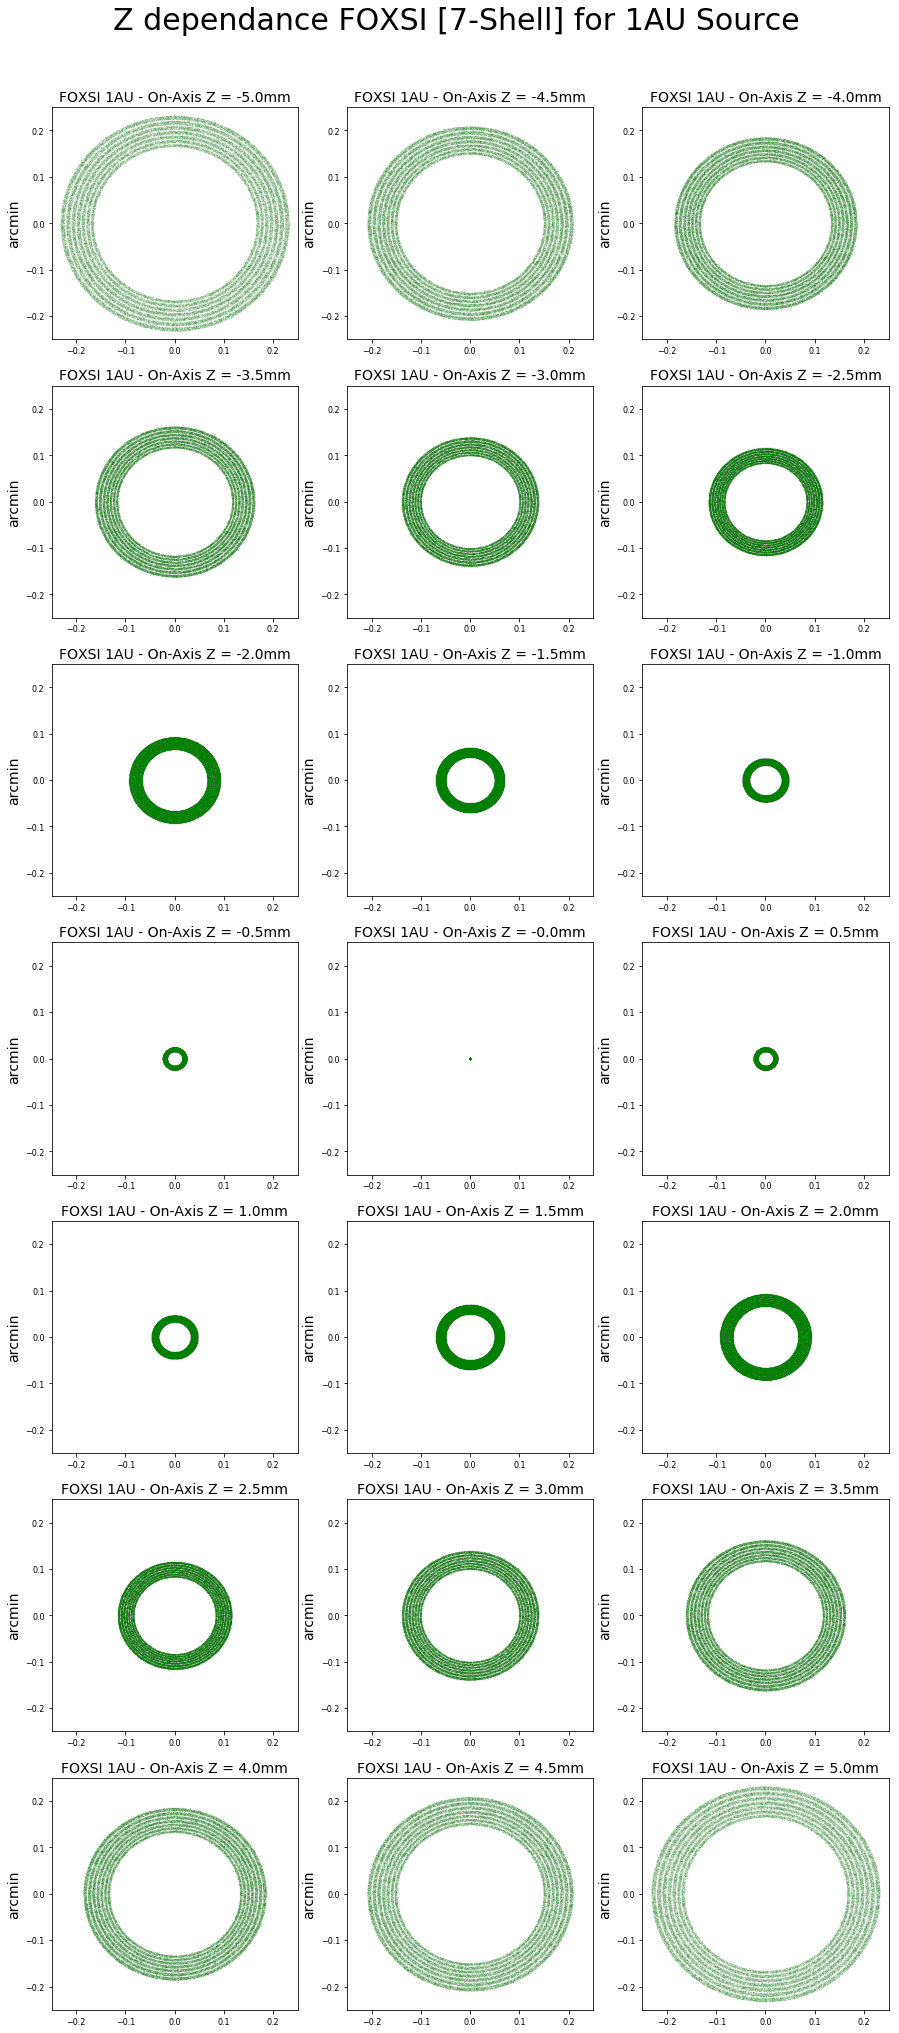

In [20]:
fig = plt.figure(figsize=(15,35))
st = fig.suptitle("Z dependance FOXSI [7-Shell] for 1AU Source", fontsize=30,y=0.92)
for i, z in enumerate(Zs):
    plt.subplot(7,3,i+1)
    plt.title('FOXSI 1AU - On-Axis Z = '+'{:.1f}'.format(z*10.)+'mm',fontsize=14)
    plt.ylabel('arcmin',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Dx7[i],All_Dy7[i],color='green',s=.001,alpha=0.8)
    plt.ylim(-.25,.25)
    plt.xlim(-.25,.25)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

# Summarizing plot

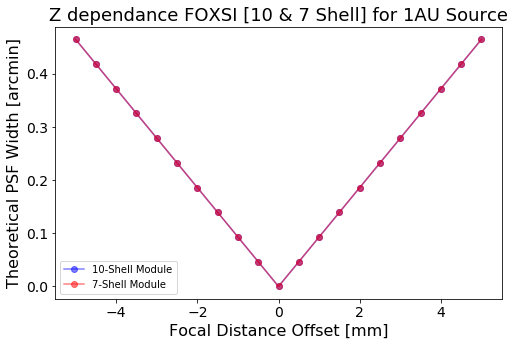

In [23]:
PSF_Width10,PSF_Width7 = [], []

for i, z in enumerate(Zs):
    PSF_Width10.append(max(All_Dx[i])-min(All_Dx[i]))

for i, z in enumerate(Zs):
    PSF_Width7.append(max(All_Dx7[i])-min(All_Dx7[i]))
    
## Plot:
fig = plt.figure(figsize=(8,5))
plt.plot(Zs*10,PSF_Width10,'bo-',alpha=0.5,label='10-Shell Module')
plt.plot(Zs*10,PSF_Width7,'ro-',alpha=0.5,label='7-Shell Module')
plt.title("Z dependance FOXSI [10 & 7 Shell] for 1AU Source", fontsize=18)
plt.xlabel('Focal Distance Offset [mm]',fontsize=16)
plt.ylabel('Theoretical PSF Width [arcmin]',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend()